## Data cleaning

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading the data set "Dataset.csv" as df
df = pd.read_csv("Dataset.csv")

#First five rows of data
df.head()

,id,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,0,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,0,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,0,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,0,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,0,Morning,Mumbai,Economy,2.33,1,5955


In [7]:
#Last five rows of data
df.tail()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
300148,300148,Vistara,UK-822,Chennai,Morning,1,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,1,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,1,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,1,Evening,Hyderabad,Business,10.00,49,81585
300152,300152,Vistara,UK-822,Chennai,Morning,1,Evening,Hyderabad,Business,10.08,49,81585


In [8]:
# checking no.of cloumns in data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  int64  
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 27.5+ MB


In [9]:
# Describing
df.describe()

,Unnamed: 0,stops,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,0.924312,12.221021,26.004751,20889.660523
std,86646.852011,0.398106,7.191997,13.561004,22697.767366
min,0.000000,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,1.000000,6.830000,15.000000,4783.000000
50%,150076.000000,1.000000,11.250000,26.000000,7425.000000
75%,225114.000000,1.000000,16.170000,38.000000,42521.000000
max,300152.000000,2.000000,49.830000,49.000000,123071.000000


### Dealing with null values

In [51]:
# checking null values
df.isnull()

,id,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,False,False,False,False,False,False,False,False,False,False,False,False
300149,False,False,False,False,False,False,False,False,False,False,False,False
300150,False,False,False,False,False,False,False,False,False,False,False,False
300151,False,False,False,False,False,False,False,False,False,False,False,False


#### There is no null values in the Dataset

In [7]:
# checking the missing values
df.isnull().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

#### There is no missing values in the Dataset

### Dealing with Outliers

<AxesSubplot:xlabel='price'>

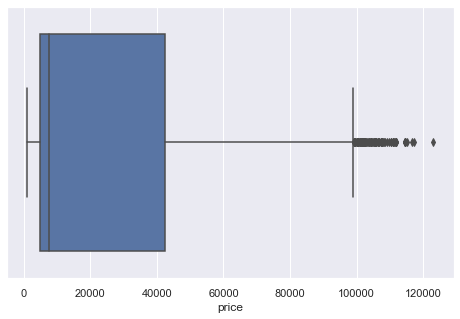

In [12]:
# ploting outliers using boxplot
plt.figure(figsize=(8,5))
sns.boxplot(df['price'])

In [9]:
#position of the outliers
print(np.where(df['price']>99000))

(array([215858, 215859, 216025, 216094, 216095, 216096, 216167, 216307,
       216308, 216440, 216441, 216795, 216796, 216928, 217278, 217279,
       217408, 219183, 219232, 221883, 221884, 221971, 221972, 222023,
       222094, 222422, 222892, 225355, 230084, 230085, 230086, 230087,
       230088, 230089, 230090, 230091, 230092, 230156, 230157, 230158,
       230159, 230160, 230161, 230492, 230493, 230763, 234422, 238127,
       241547, 241548, 241598, 241599, 241879, 244852, 248803, 248804,
       248968, 250206, 253990, 261289, 261372, 261373, 261374, 261375,
       261376, 261377, 261498, 261499, 262027, 262194, 262195, 262196,
       262309, 262758, 262817, 263647, 263752, 264121, 264191, 264192,
       264193, 264194, 264267, 264268, 264560, 266806, 267372, 267529,
       267530, 268215, 269091, 269470, 270367, 270417, 270512, 270856,
       270997, 270998, 270999, 277344, 277345, 287664, 290443, 290444,
       290445, 290503, 290563, 290564, 290565, 290566, 290567, 290568,
     

In [10]:
#Finding IQR values
Q1 = np.percentile(df['price'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df['price'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1

#Printing Q1 value
print(Q1)

#Printing Q3 value
print(Q3)

#printing IQR value
print(IQR)

4783.0
42521.0
37738.0


In [11]:
# Above Upper bound
upper = df['price'] >= (Q3+1.5*IQR)
 
print("Upper bound:",upper)
print(np.where(upper))
 
# Below Lower bound
lower = df['price'] <= (Q1-1.5*IQR)
print("Lower bound:", lower)
print(np.where(lower))

#Old shape

# Upper bound
upper = np.where(df['price'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df['price'] <= (Q1-1.5*IQR))

Upper bound: 0         False
1         False
2         False
3         False
4         False
          ...  
300148    False
300149    False
300150    False
300151    False
300152    False
Name: price, Length: 300153, dtype: bool
(array([215858, 215859, 216025, 216094, 216095, 216096, 216167, 216307,
       216308, 216440, 216441, 216795, 216796, 216928, 217278, 217279,
       217408, 219183, 219232, 221883, 221884, 221971, 221972, 222023,
       222094, 222422, 222892, 225355, 230084, 230085, 230086, 230087,
       230088, 230089, 230090, 230091, 230092, 230156, 230157, 230158,
       230159, 230160, 230161, 230492, 230493, 230763, 234422, 238127,
       241547, 241548, 241598, 241599, 241879, 244852, 248803, 248804,
       248968, 250206, 253990, 261289, 261372, 261373, 261374, 261375,
       261376, 261377, 261498, 261499, 262027, 262194, 262195, 262196,
       262309, 262758, 262817, 263647, 263752, 264121, 264191, 264192,
       264193, 264194, 264267, 264268, 264560, 266806, 2673

## UNIVARIATE ANALYSIS

The term univariate analysis refers to the analysis of one variable prefix “uni” means “one.” The purpose of univariate analysis is to understand the distribution of values for a single variable.

## Which type of Airlines is preferred most?

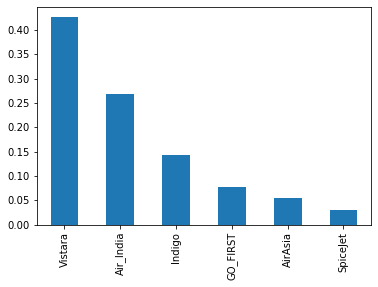

In [12]:
# Let's calculate the percentage of each airline category.
df.airline.value_counts(normalize=True)

#plot the bar graph of airlines categories
df.airline.value_counts(normalize=True).plot.bar()
plt.show()

From above graph we can conclude that 'vistara' airlines is most preferred by people 

## Which airlines preferred less?

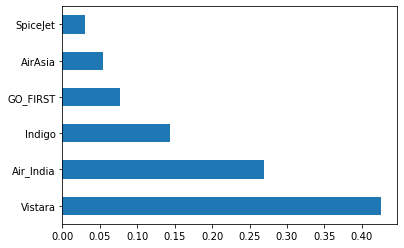

In [13]:
#plot the bar graph of airlines categories
df.airline.value_counts(normalize=True).plot.barh()
plt.show()

From above graph we can conclude that Spicejet is less preferred

<AxesSubplot:xlabel='airline', ylabel='Count'>

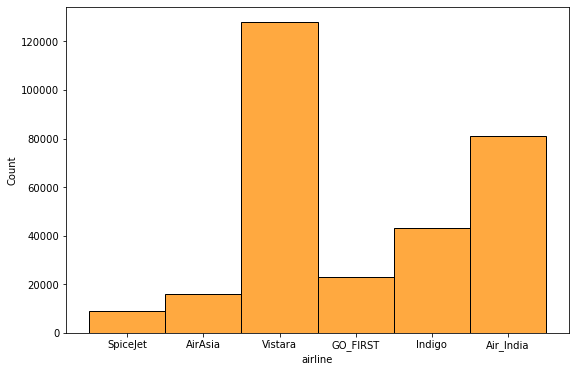

In [90]:
#histogram
plt.figure(figsize=(9,6))
sns.histplot(df.airline,color='darkorange')

<AxesSubplot:xlabel='arrival_time', ylabel='Count'>

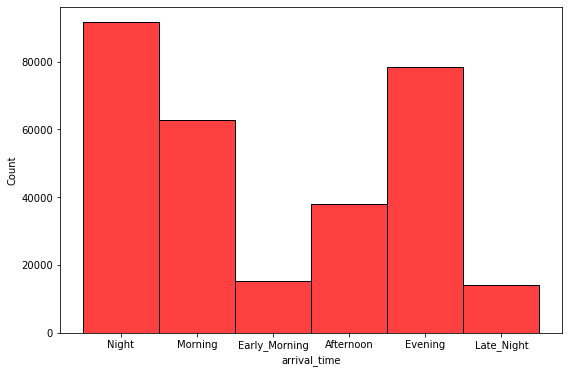

In [96]:
#histogram
plt.figure(figsize=(9,6))
sns.histplot(data=df,x='arrival_time',color='red')

<AxesSubplot:xlabel='departure_time', ylabel='Count'>

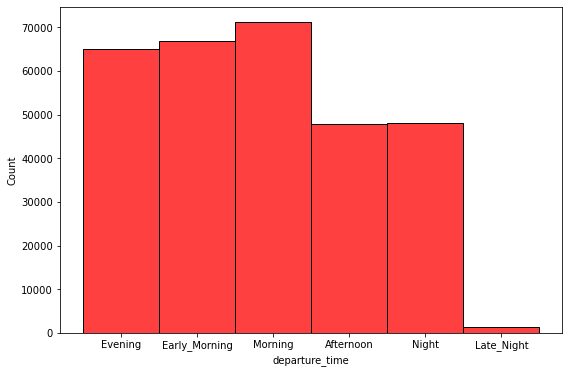

In [5]:
#histogram
plt.figure(figsize=(9,6))
sns.histplot(data=df,x='departure_time',color='red')

In [18]:
# separating numerical, categorical and dateTime features
cat_data = df.select_dtypes(exclude=[np.number, np.datetime64])
num_data = df.select_dtypes(exclude=[np.object, np.datetime64])
date_time_data = df.select_dtypes(include=[np.datetime64])
cat_data.head(2)
num_data.head(2)
# date_time_data.head(2)

,id,stops,duration,days_left,price
0,0,0,2.17,1,5953
1,1,0,2.33,1,5953


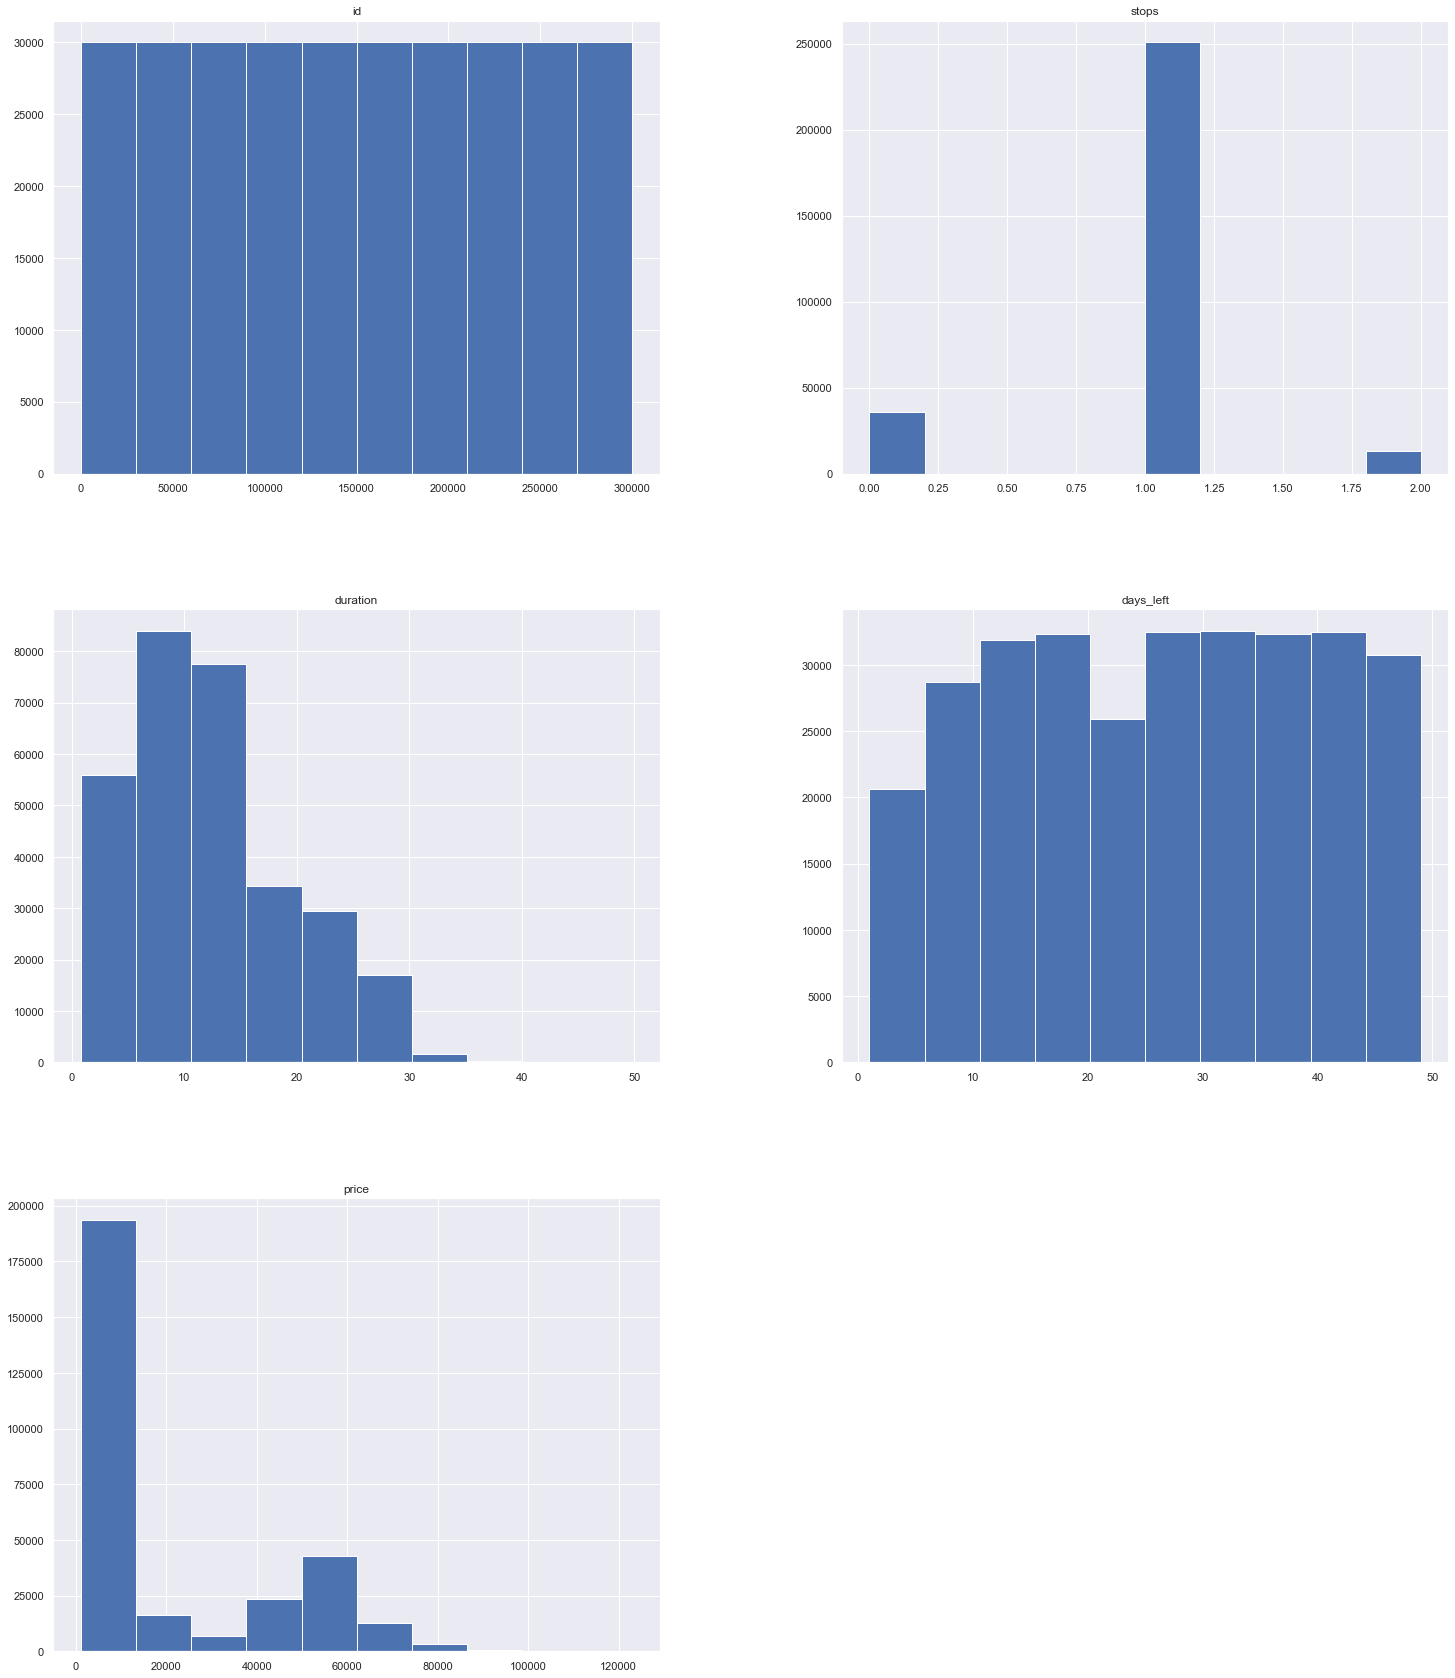

In [29]:
#ploting histograms for every column
subset = df[num_data.columns]
subset.hist(figsize=(25, 30))
plt.show()

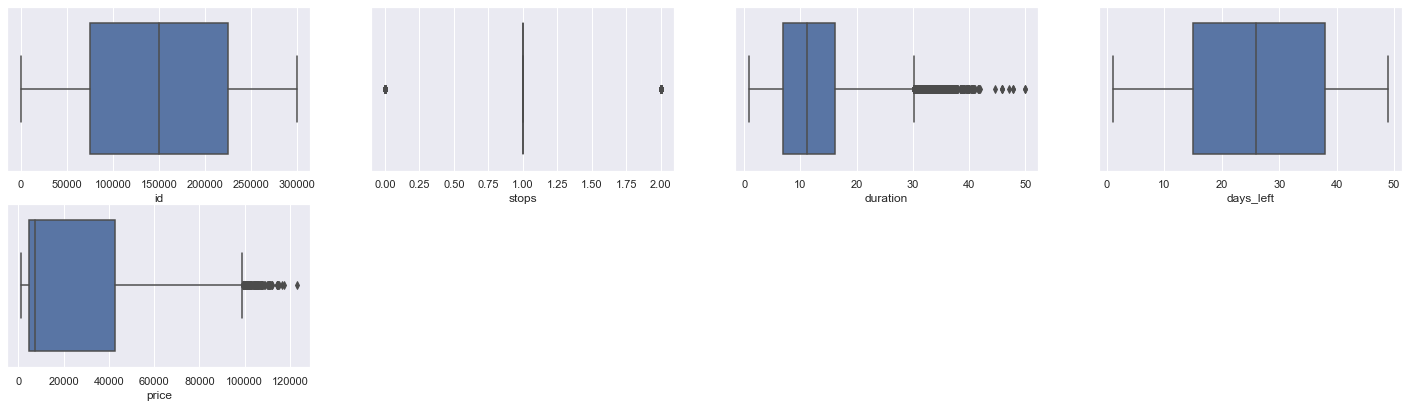

In [30]:
#ploting boxplots for every column
plt.subplots(figsize=(25, 50))
count = 1
for i in num_data.columns:
    plt.subplot(14, 4, count)
    sns.boxplot(x = num_data[i])
    count += 1
plt.show()

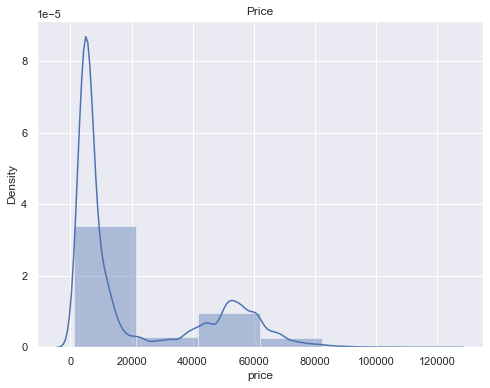

In [52]:
# let us see the distribution of price of flights 
plt.figure(figsize=(8,6))
plt.title('Price')
sns.distplot(df['price'], bins=6)
plt.show()

## Economy class vs Buisness class 

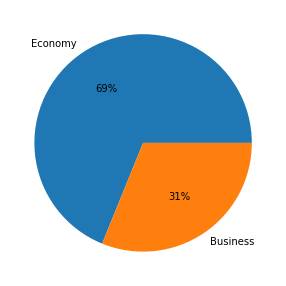

In [14]:
#ploting pie to show which class is booked more
plt.figure(figsize=(8,5))
data=df['class'].value_counts()
plt.pie(data, labels=data.index, autopct="%.0f%%");

#### Economy class is most booked class

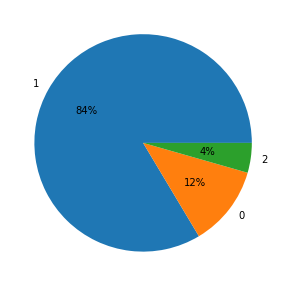

In [3]:
#ploting to show stops of flights
plt.figure(figsize=(8,5))
data=df['stops'].value_counts()
plt.pie(data, labels=data.index, autopct="%.0f%%");

## Stops of Flights

<AxesSubplot:xlabel='stops', ylabel='count'>

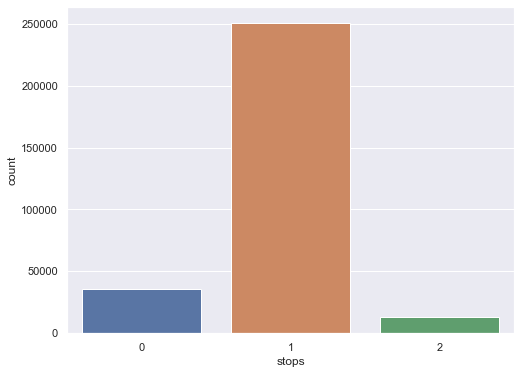

In [54]:
#visuallizing no.of stops of flights
plt.figure(figsize=(8,6))
sns.countplot(df.stops)

#### From above graph most flights are stopping only once

## Which Airline had more bookings in Business class

<AxesSubplot:xlabel='airline', ylabel='count'>

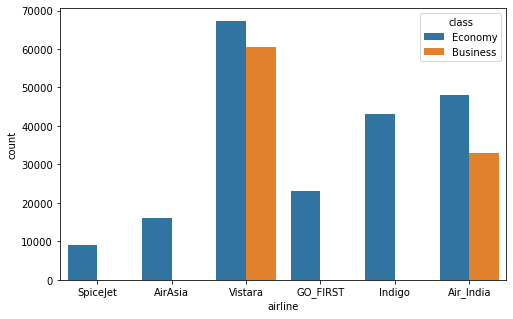

In [16]:
#visuallizing which class is booked more with respective airline
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="airline", hue="class")

### From above graph we can conclude that 
#### 1)'vistara' had more no.of business class bookings
#### 2)'vistara' had more no.of economy class bookings
#### 3)'spicejet' had less no .of economy and business class bookings

## Stops of flights with respective of airline

<AxesSubplot:xlabel='airline', ylabel='count'>

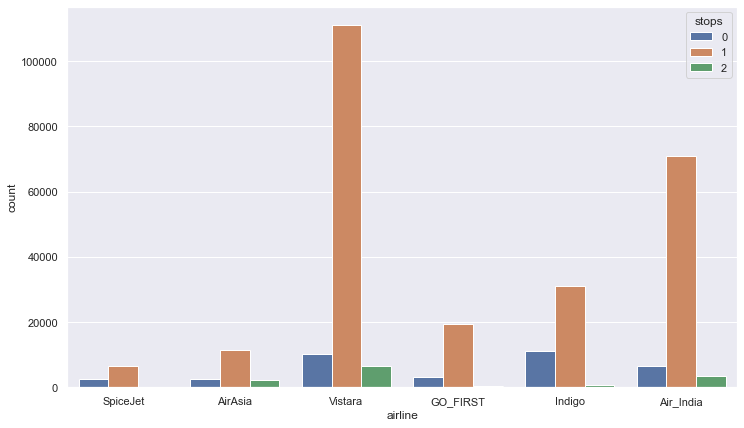

In [58]:
#visualizing stops of different airlines
plt.figure(figsize=(12,7))
sns.countplot(data=df, x='airline', hue='stops')

###  From above graph we can conclude that
####  1) "Vistara" had more no.of 'single' stops
####  2)"Indigo" had more no.of 'zero' stops
####  3)"Vistara" had more no.of 'two' stops

## How many flights for different airlines

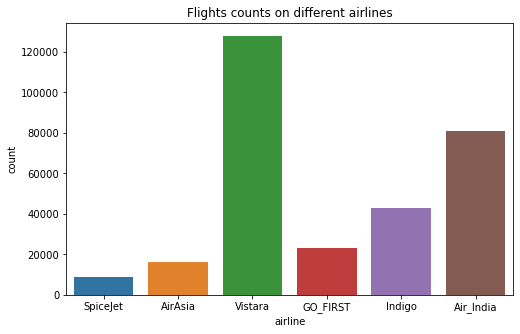

In [104]:
#Visualizing no.of flights of  airlines
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='airline')
plt.title("Flights counts on different airlines")
plt.show()

### From above we can conclude that
#### 1)Vistara had more no.of flights
#### 2)Spicejet had less no.of flights

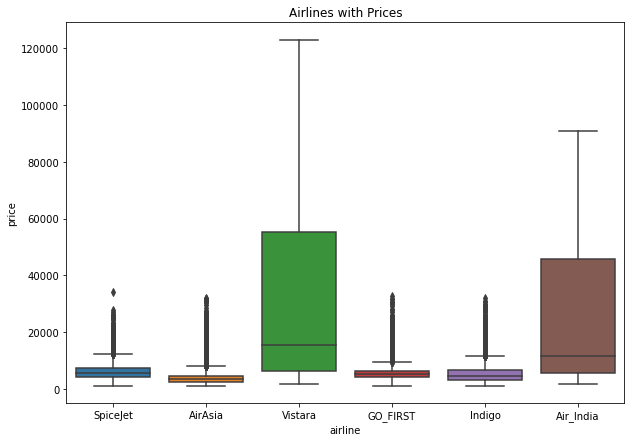

In [25]:
plt.figure(figsize = (10,7))
sns.boxplot(data=df, x="airline", y="price")
plt.title("Airlines with Prices")
plt.show()

<AxesSubplot:xlabel='duration', ylabel='Density'>

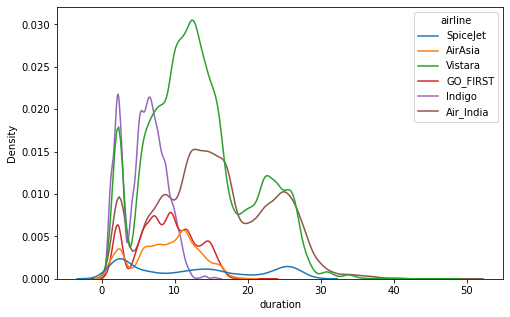

In [36]:
#using KDE plot
plt.figure(figsize=(8, 5))
sns.kdeplot(x='duration', data=df, hue='airline')

<AxesSubplot:xlabel='stops', ylabel='Density'>

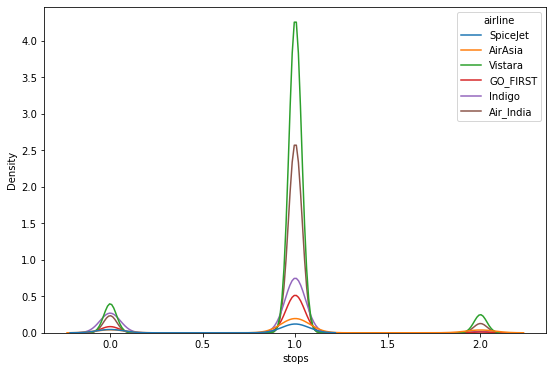

In [98]:
#KDE plot
plt.figure(figsize=(9,6))
sns.kdeplot(data=df,x='stops',hue='airline')

<AxesSubplot:xlabel='price', ylabel='Count'>

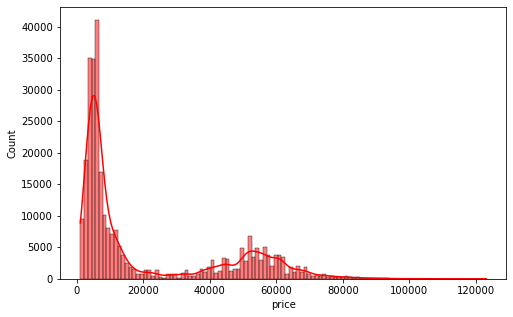

In [100]:
# with histogram - sns.histplot(kde=TRUE)
plt.figure(figsize=(8, 5))
plt.xlabel='Count'
plt.ylabel='price'
sns.histplot(x='price', data=df, kde=True, color='red')

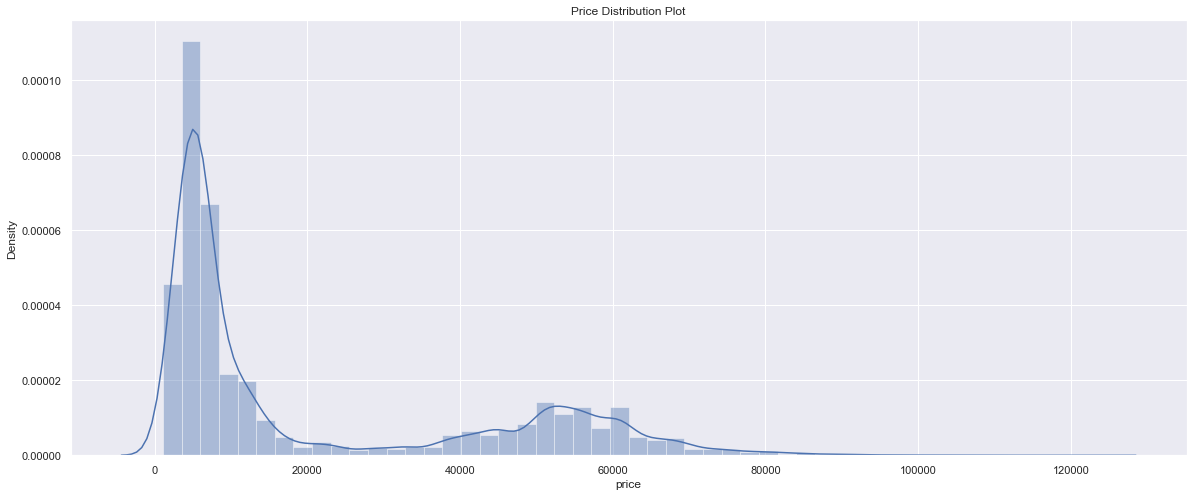

In [16]:
#distplot
plt.figure(figsize=(20,8))
plt.title('Price Distribution Plot')
sns.distplot(df.price)
plt.show()

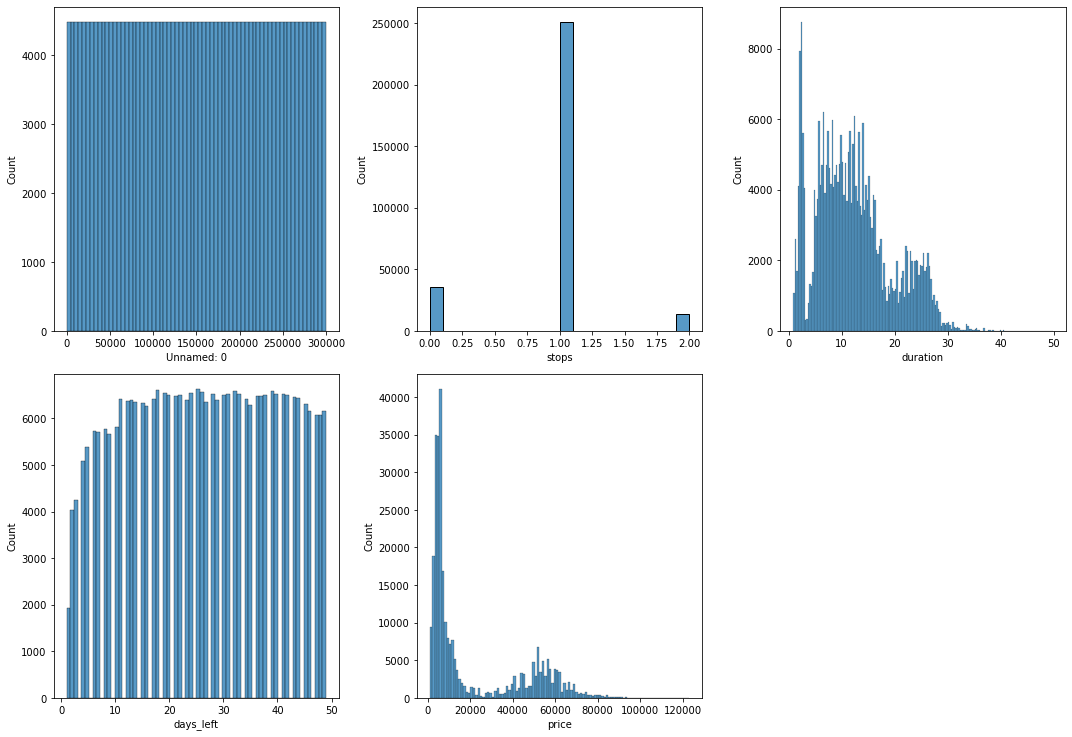

In [44]:
cols = 3
rows = 3
num_cols = df.select_dtypes(exclude='object').columns
fig = plt.figure( figsize=(cols*5, rows*5))
for i, col in enumerate(num_cols):
#for i in num_cols:    
    ax=fig.add_subplot(rows,cols,i+1)
    
    sns.histplot(x = df[col], ax = ax)
    
fig.tight_layout()  
plt.show()

<AxesSubplot:xlabel='duration'>

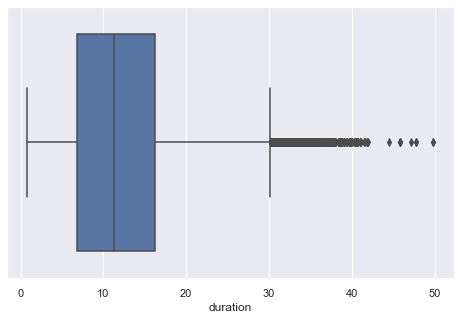

In [18]:
#boxplot
plt.figure(figsize=(8,5))
sns.boxplot(df['duration'])

<AxesSubplot:xlabel='price'>

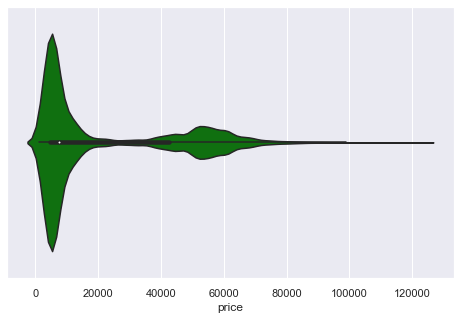

In [19]:
#violinplot
plt.figure(figsize=(8,5))
sns.violinplot(df['price'],color='green')

<AxesSubplot:xlabel='duration', ylabel='Density'>

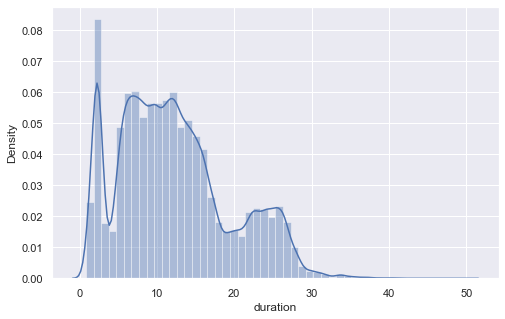

In [20]:
#distplot
plt.figure(figsize=(8,5))
sns.distplot(df['duration'])

# Bivariate Analysis

Multivariate analysis is the analysis of more than one variable.

<AxesSubplot:title={'center':'Prices of Airline'}, xlabel='airline', ylabel='price'>

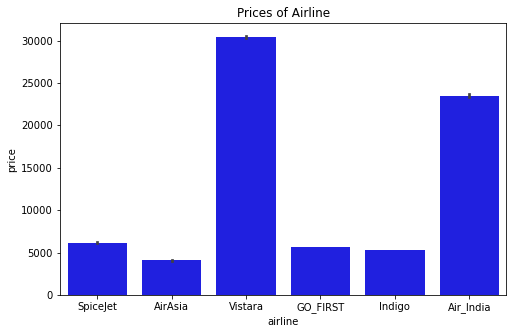

In [75]:
#barplot (categorical-numerical)
plt.figure(figsize=(8,5))
plt.title("Prices of Airline")
sns.barplot(data=df, x='airline',y='price',color='blue')

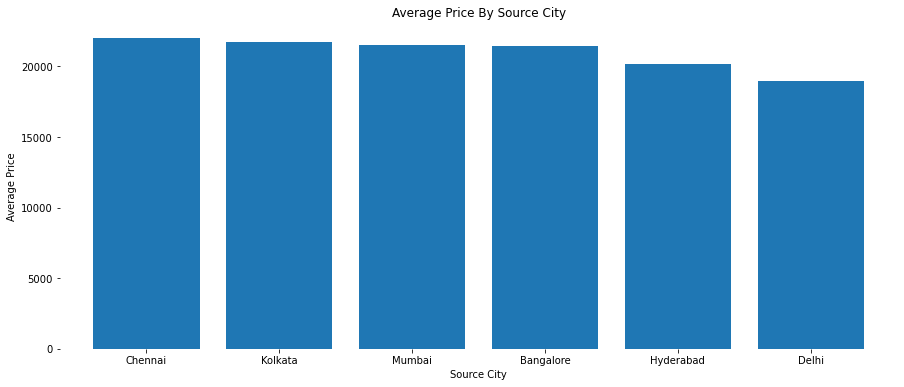

In [26]:
#Average price by source_city
fig, ax = plt.subplots(figsize=(15, 6))
df.groupby(['source_city'])['price'].mean().sort_values(ascending=False).plot(kind = 'bar', width= 0.8)
ax.set(title = "Average Price By Source City",
       xlabel = "Source City",
       ylabel = "Average Price")
plt.setp(ax.get_xticklabels(), rotation = 0)
plt.box(False)
plt.show()

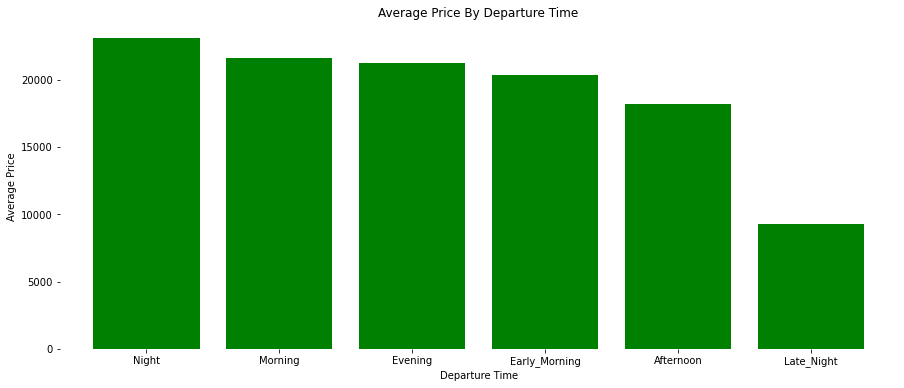

In [5]:
#Average price by departure time
fig, ax = plt.subplots(figsize=(15, 6))
df.groupby(['departure_time'])['price'].mean().sort_values(ascending=False).plot(kind = 'bar', width= 0.8,color='g')
ax.set(title = "Average Price By Departure Time",
       xlabel = "Departure Time",
       ylabel = "Average Price")
plt.setp(ax.get_xticklabels(), rotation = 0)
plt.box(False)
plt.show()

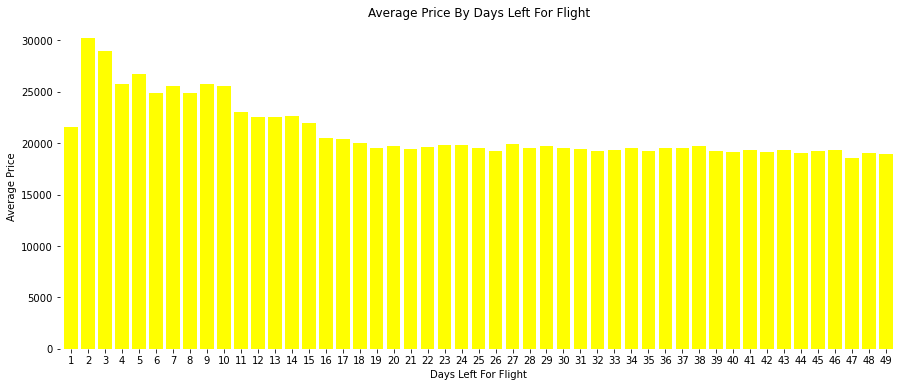

In [33]:
#Average price by days left for flight
fig, ax = plt.subplots(figsize=(15, 6))
df.groupby(['days_left'])['price'].mean().plot(kind = 'bar', width= 0.8,color='yellow')
ax.set(title = "Average Price By Days Left For Flight",
       xlabel = "Days Left For Flight",
       ylabel = "Average Price")
plt.setp(ax.get_xticklabels(), rotation = 0)
plt.box(False)
plt.show()

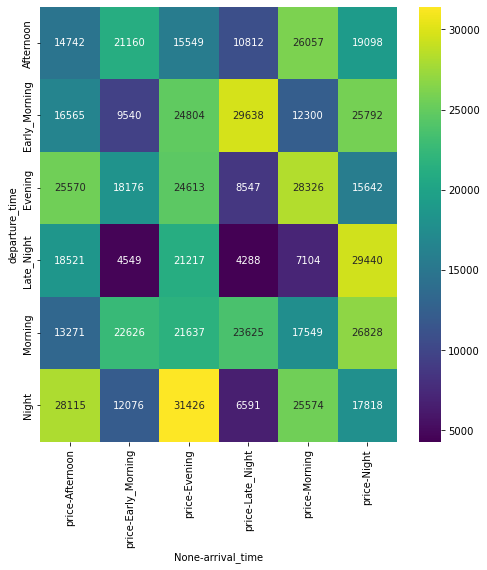

In [29]:
#heatmap
heatmapdf = pd.pivot_table(df, values=['price'], index=['departure_time'],
                    columns=['arrival_time'], aggfunc=np.mean)
plt.figure(figsize=(8, 8))
sns.heatmap(heatmapdf, annot=True, cmap='viridis',fmt=".0f")
plt.show()

<AxesSubplot:xlabel='stops', ylabel='price'>

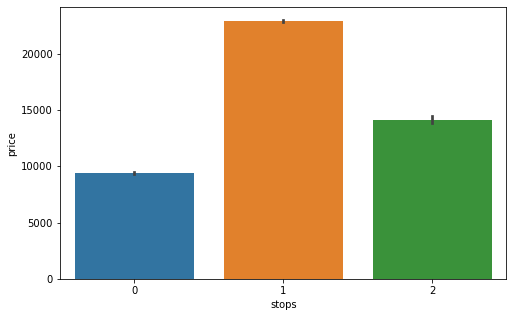

In [67]:
#barplot (numerical-numerical)
plt.figure(figsize=(8,5))
sns.barplot(data=df,x='stops',y='price')

<AxesSubplot:xlabel='airline', ylabel='price'>

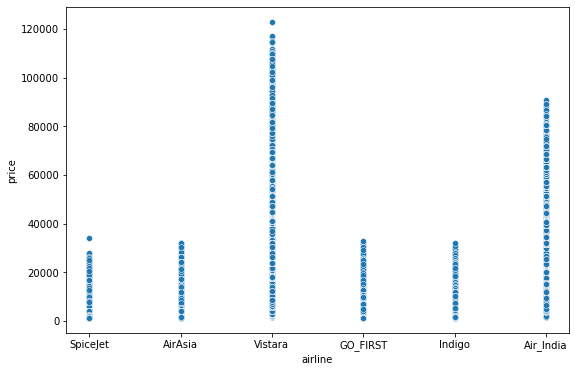

In [70]:
#scatterplot
plt.figure(figsize=(9,6))
sns.scatterplot(data=df,x='airline',y='price')

In [ ]:
`

<AxesSubplot:title={'center':'Prices versus Days_left'}, xlabel='days_left', ylabel='price'>

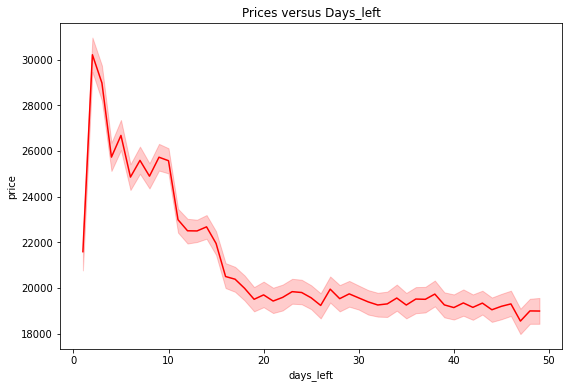

In [82]:
#lineplot
plt.figure(figsize=(9,6))
plt.title("Prices versus Days_left")
sns.lineplot(data=df,x='days_left',y='price',color="red")

<AxesSubplot:title={'center':'Tickets vs Daysleft'}, xlabel='days_left', ylabel='price'>

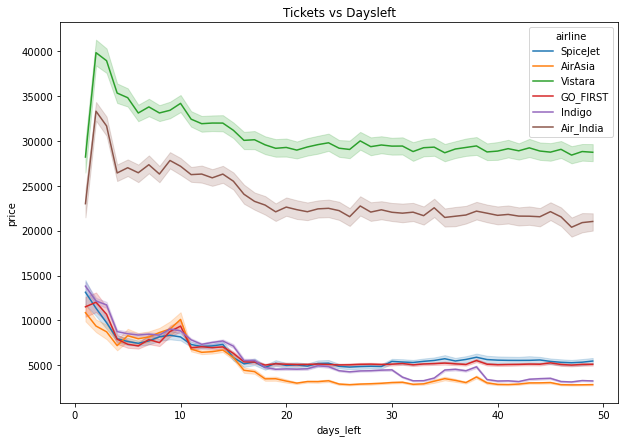

In [87]:
#lineplot
plt.figure(figsize=(10,7))
plt.title("Tickets vs Daysleft")
sns.lineplot(data=df,x='days_left',y='price',hue='airline')

<AxesSubplot:xlabel='duration', ylabel='price'>

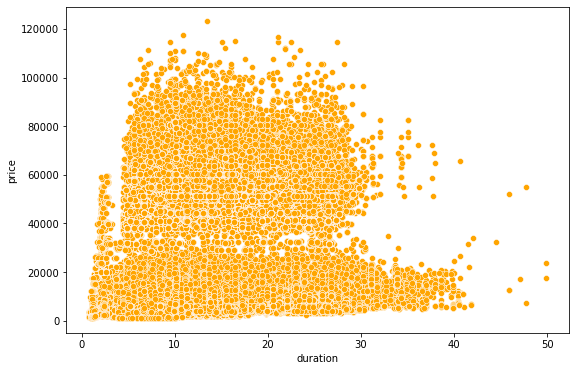

In [118]:
#scatterplot
plt.figure(figsize=(9,6))
sns.scatterplot(data=df,x='duration',y='price',color='orange')

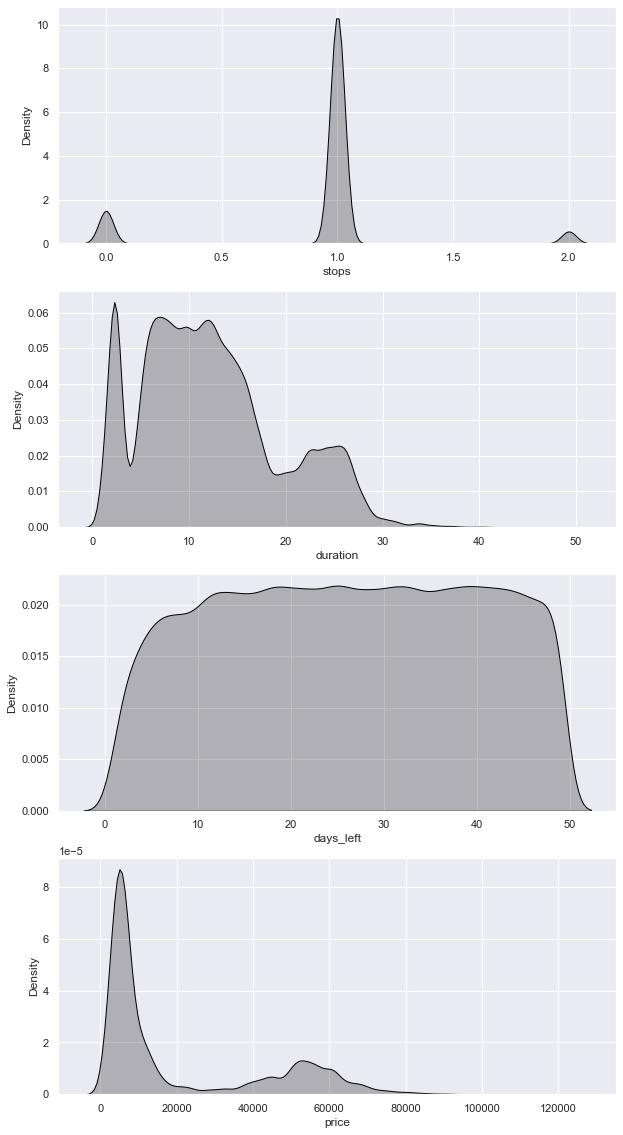

In [125]:
#KDE plot
numeric_cols=['stops','duration','days_left','price']
fig, axs = plt.subplots(4,figsize=(10,20))

sns.set_theme(style="darkgrid")
for index, cols in enumerate(numeric_cols):
    sns.kdeplot(data=df, x=cols, ax=axs[index], fill=True, color='black')

<Figure size 720x720 with 0 Axes>

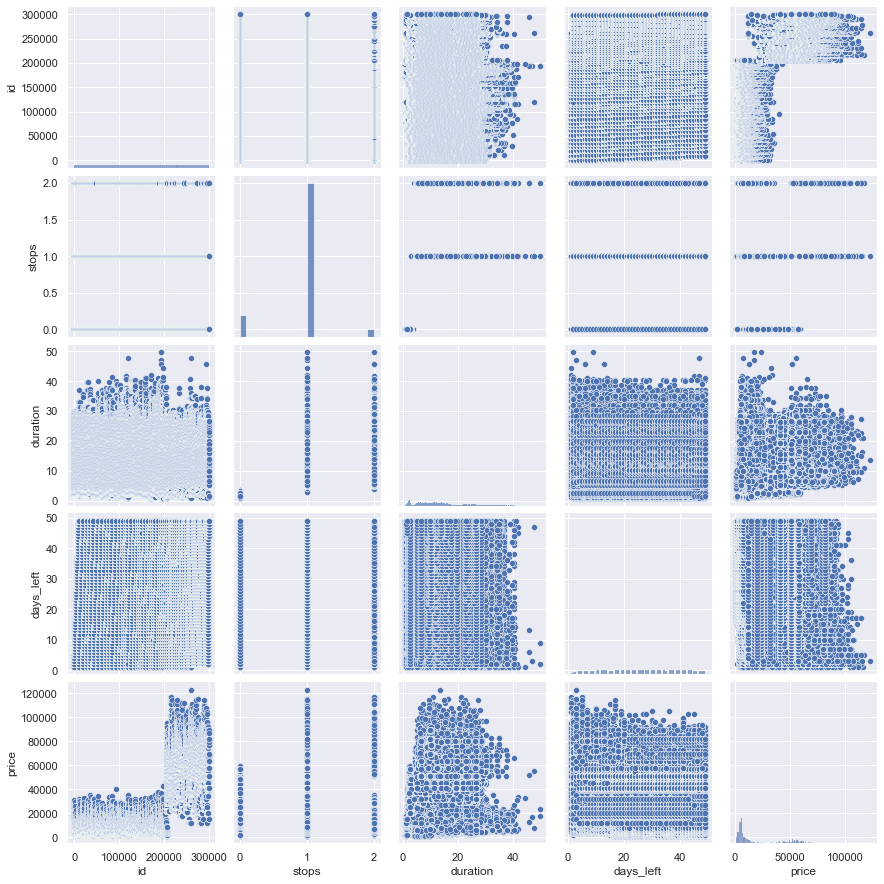

In [60]:
#ploting pairplots for every column
plt.figure()
sns.pairplot(num_data)

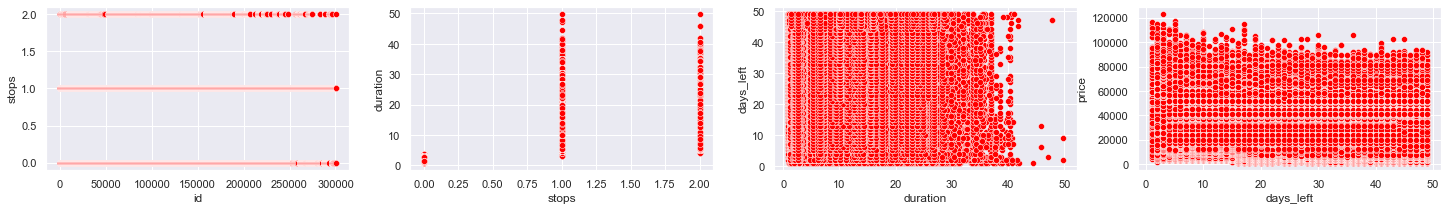

In [35]:
#scatterplot
plt.subplots(figsize=(25,50))
count = 1
for i in range(len(num_data.columns)-1):
    plt.subplot(14, 4, count)
    sns.scatterplot(x=num_data.columns[i], y=num_data.columns[i+1],
                        data=num_data, color='red')
    count += 1
plt.show()

## Correlation between the features

<AxesSubplot:>

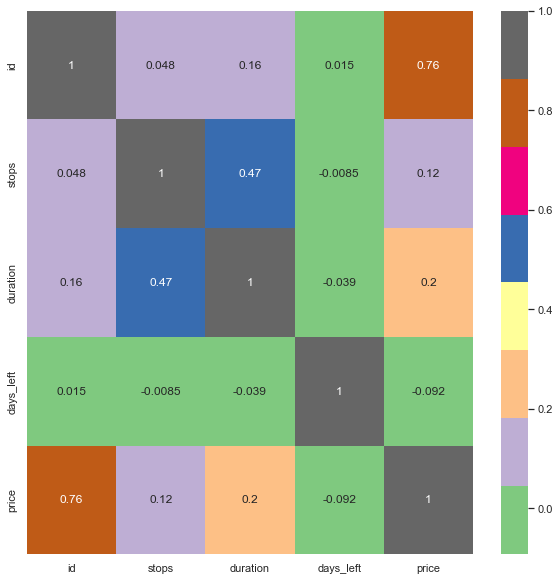

In [44]:
corr = df.corr() # Finding out the correlation between the features
sns.set(rc={'figure.figsize': (10,10)}) # Plotting the heatmap of correlation between features
sns.heatmap(corr, annot=True, cmap='Accent')

# STATISTICAL ANALYSIS

## What is the average price of flights

In [4]:
#checking avearge price of flights
df['price'].mean()

20889.660523133203

## What is the Highest price of flights

In [14]:
df.price.max()

123071

## What is the lowest price of flights

In [11]:
df['price'].min()

1105

## What is the average Duration of flights

In [12]:
df['duration'].mean()

12.221020812717917

## What is the higest duration of Joureny

In [13]:
df['duration'].max()

49.83

## What is the lowest duration of journey

In [14]:
df['duration'].min()

0.83

## How many passengers are from Hyderabad?

In [21]:
df[df['source_city']=='Hyderabad']['airline'].count()

40806

## How many passengers are from Delhi?

In [22]:
df[df['source_city']=='Delhi']['airline'].count()

61343

In [8]:
#passengers from chennai
df[df['source_city']=='Chennai']['airline'].count()

38700

## What is the average price of airlines

In [23]:
df.groupby('airline').mean()['price']

airline
AirAsia       4091.072742
Air_India    23507.019112
GO_FIRST      5652.007595
Indigo        5324.216303
SpiceJet      6179.278881
Vistara      30396.536302
Name: price, dtype: float64

## What is the average haults of airlines

In [24]:
df.groupby('airline').mean()['stops']

airline
AirAsia      0.988322
Air_India    0.963779
GO_FIRST     0.878393
Indigo       0.757004
SpiceJet     0.726778
Vistara      0.969951
Name: stops, dtype: float64

## How many passengers from different source_city

In [25]:
df.groupby('source_city').count()['id']

source_city
Bangalore    52061
Chennai      38700
Delhi        61343
Hyderabad    40806
Kolkata      46347
Mumbai       60896
Name: id, dtype: int64

## Which flight price is low

In [40]:
df[df['price']==df['price'].min()]

,id,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
203807,203807,AirAsia,I5-517,Chennai,Morning,0,Morning,Hyderabad,Economy,1.17,16,1105
203808,203808,GO_FIRST,G8-505,Chennai,Evening,0,Evening,Hyderabad,Economy,1.25,16,1105
203908,203908,AirAsia,I5-517,Chennai,Morning,0,Morning,Hyderabad,Economy,1.17,17,1105
203909,203909,GO_FIRST,G8-505,Chennai,Evening,0,Evening,Hyderabad,Economy,1.25,17,1105
204003,204003,AirAsia,I5-517,Chennai,Morning,0,Morning,Hyderabad,Economy,1.17,18,1105
...,...,...,...,...,...,...,...,...,...,...,...,...
206601,206601,Indigo,6E-7261,Chennai,Morning,1,Evening,Hyderabad,Economy,7.92,49,1105
206602,206602,Indigo,6E-611,Chennai,Evening,1,Late_Night,Hyderabad,Economy,8.25,49,1105
206603,206603,Indigo,6E-581,Chennai,Morning,1,Evening,Hyderabad,Economy,9.17,49,1105
206604,206604,Indigo,6E-7127,Chennai,Afternoon,1,Night,Hyderabad,Economy,9.50,49,1105


## At what time most people are departured?

In [10]:
df['departure_time'].value_counts()

Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: departure_time, dtype: int64

In [11]:
df['arrival_time'].value_counts()

Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: arrival_time, dtype: int64

In [9]:
df['destination_city'].value_counts()

Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: destination_city, dtype: int64

## How many people have their destination as Hyderabad?

In [50]:
df[df['destination_city']=='Hyderabad']['airline'].count()

42726

In [8]:
df[df['airline']=='Vistara'].count()

id                  127859
airline             127859
flight              127859
source_city         127859
departure_time      127859
stops               127859
arrival_time        127859
destination_city    127859
class               127859
duration            127859
days_left           127859
price               127859
dtype: int64

In [10]:
df[df['airline']=='Spicejet'].count()

id                  0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [11]:
df[df['airline']=='Indigo'].count()

id                  43120
airline             43120
flight              43120
source_city         43120
departure_time      43120
stops               43120
arrival_time        43120
destination_city    43120
class               43120
duration            43120
days_left           43120
price               43120
dtype: int64

In [12]:
df[df['airline']=='AirAsia'].count()

id                  16098
airline             16098
flight              16098
source_city         16098
departure_time      16098
stops               16098
arrival_time        16098
destination_city    16098
class               16098
duration            16098
days_left           16098
price               16098
dtype: int64

In [14]:
df[df['airline']=='GO_FIRST'].count()

id                  23173
airline             23173
flight              23173
source_city         23173
departure_time      23173
stops               23173
arrival_time        23173
destination_city    23173
class               23173
duration            23173
days_left           23173
price               23173
dtype: int64

In [15]:
df[df['airline']=='Air_India'].count()

id                  80892
airline             80892
flight              80892
source_city         80892
departure_time      80892
stops               80892
arrival_time        80892
destination_city    80892
class               80892
duration            80892
days_left           80892
price               80892
dtype: int64

<AxesSubplot:xlabel='id', ylabel='airline'>

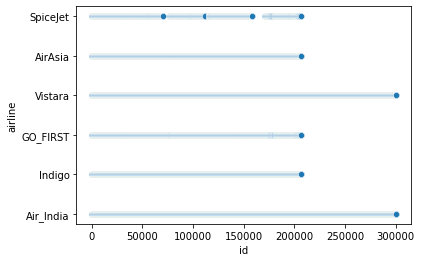

In [6]:
sns.scatterplot(data=df,x='id',y='airline')

In [4]:
df['price'].median()

7425.0

In [5]:
df['price'].mode()

0    54608
Name: price, dtype: int64

# Multivariate analysis

<Figure size 720x480 with 0 Axes>

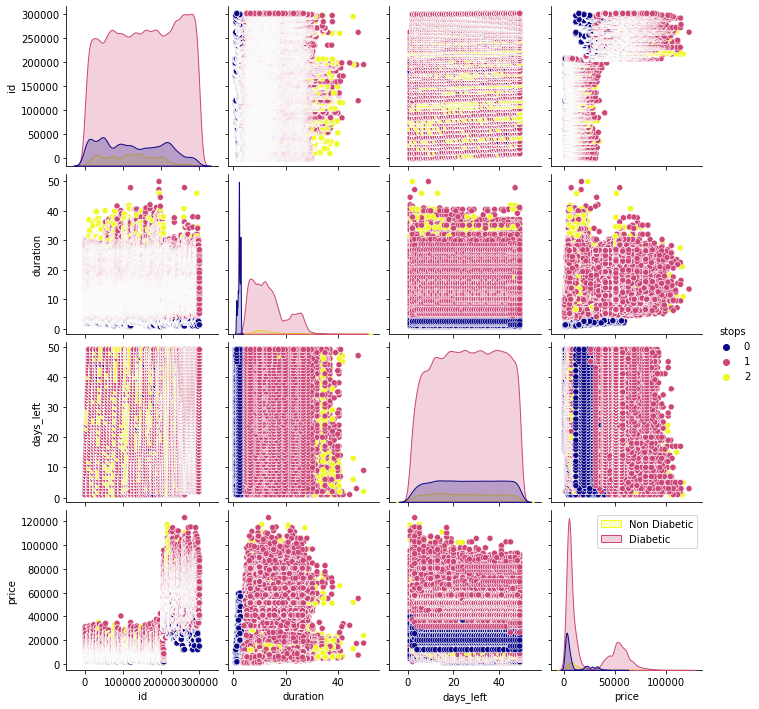

In [4]:
plt.figure(dpi = 120)
sns.pairplot(df,hue = 'stops',palette = 'plasma')
plt.legend(['Non Diabetic','Diabetic'])
plt.show()

1)We can clearly see that data points are not seperable linearly according to Outcome. Distribution of variables are normal, In some variables they are skewed to right due to Outliers. Treating Outliers may help to get rid of them. Because data points are spread non linear, Fitting tree based models might help us to get better accuracy or SVC with Non Linear Dicision Boundry.

2)Well,price,days_left, and duration having skewed distribution. We know most of the machine learning models uses assumpton of normality so these variables might need to be scaled, But we may consider the assumption to be true according Central Limit Theorem that if number of observation is large we can consider the distribution to be normal or bell shaped. Removing Outliers may also help us to achieve normal distribution of that variable.

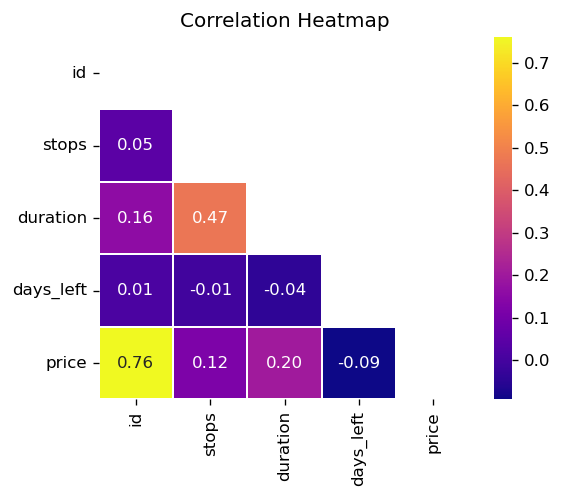

In [5]:
plt.figure(dpi = 120,figsize= (5,4))
mask = np.triu(np.ones_like(df.corr(),dtype = bool))
sns.heatmap(df.corr(),mask = mask, fmt = ".2f",annot=True,lw=1,cmap = 'plasma')
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title('Correlation Heatmap')
plt.show()


variables are not much really associated linearly

Joint plot of price with Other Variables ==> 

Correlation between price and stops ==>  0.1196484707241471


<Figure size 500x400 with 0 Axes>

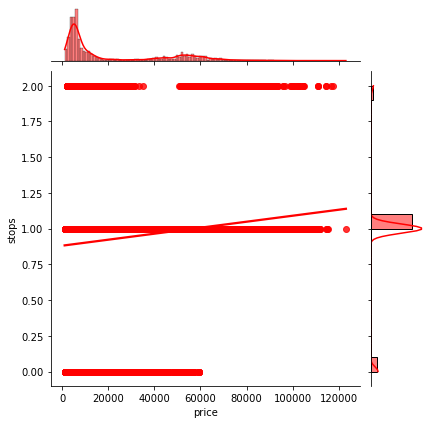

Correlation between price and duration ==>  0.20422236784543787


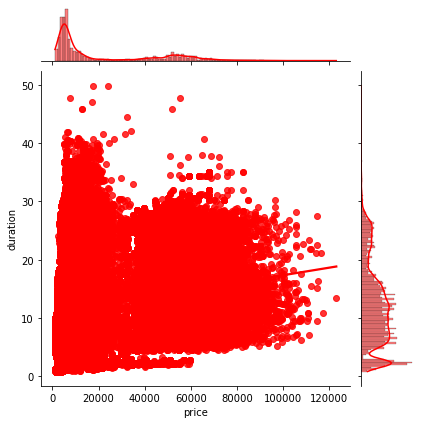

Correlation between price and days_left ==>  -0.09194853217143521


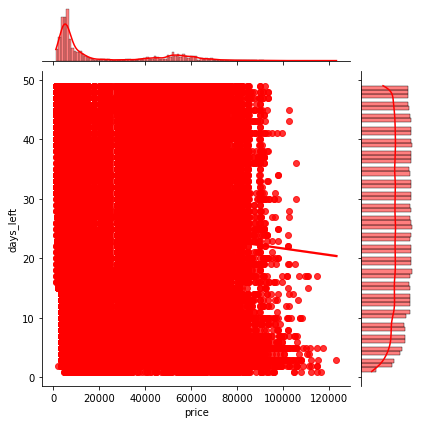

In [12]:
plt.figure(dpi = 100, figsize = (5,4))
print("Joint plot of price with Other Variables ==> \n")
for i in  df.columns:
    if i != 'price' and i != 'id' and i != 'airline' and i != 'source_city' and i != 'destination_city' and i != 'flight' and i != 'departure_time' and i != 'arrival_time' and i != 'class':
        print(f"Correlation between price and {i} ==> ",df.corr().loc['price'][i])
        sns.jointplot(x='price',y=i,data=df,kind = 'reg',color = 'red')
        plt.show()

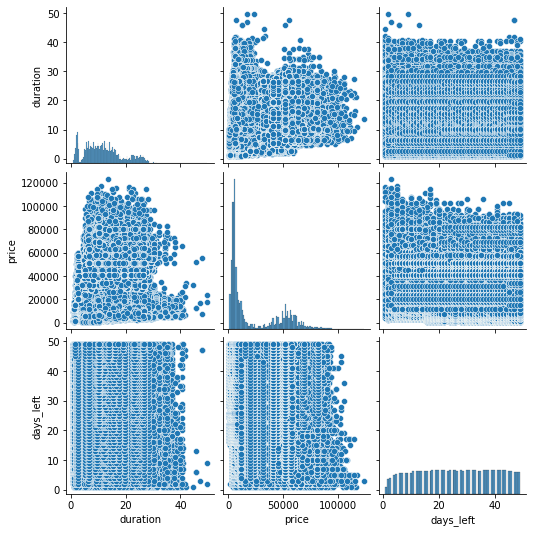

In [16]:
sns.pairplot(data = df, vars=['duration','price','days_left'])

<Figure size 432x288 with 0 Axes>

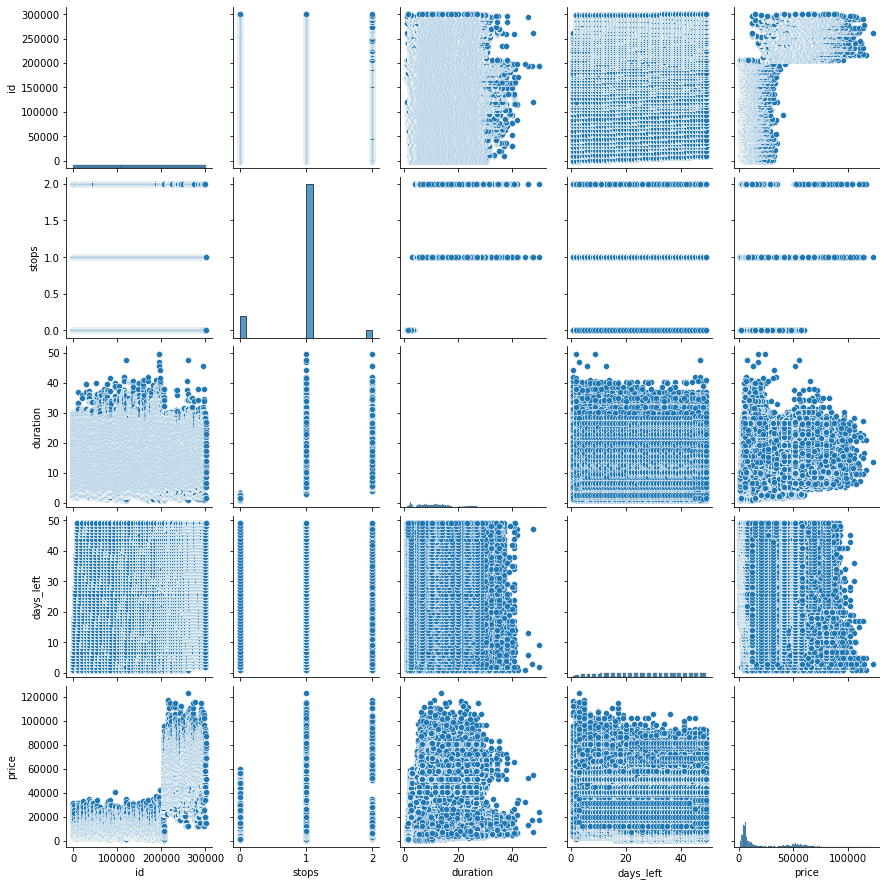

In [19]:
#ploting pairplots for every column
plt.figure()
sns.pairplot(num_data)

<Figure size 720x480 with 0 Axes>

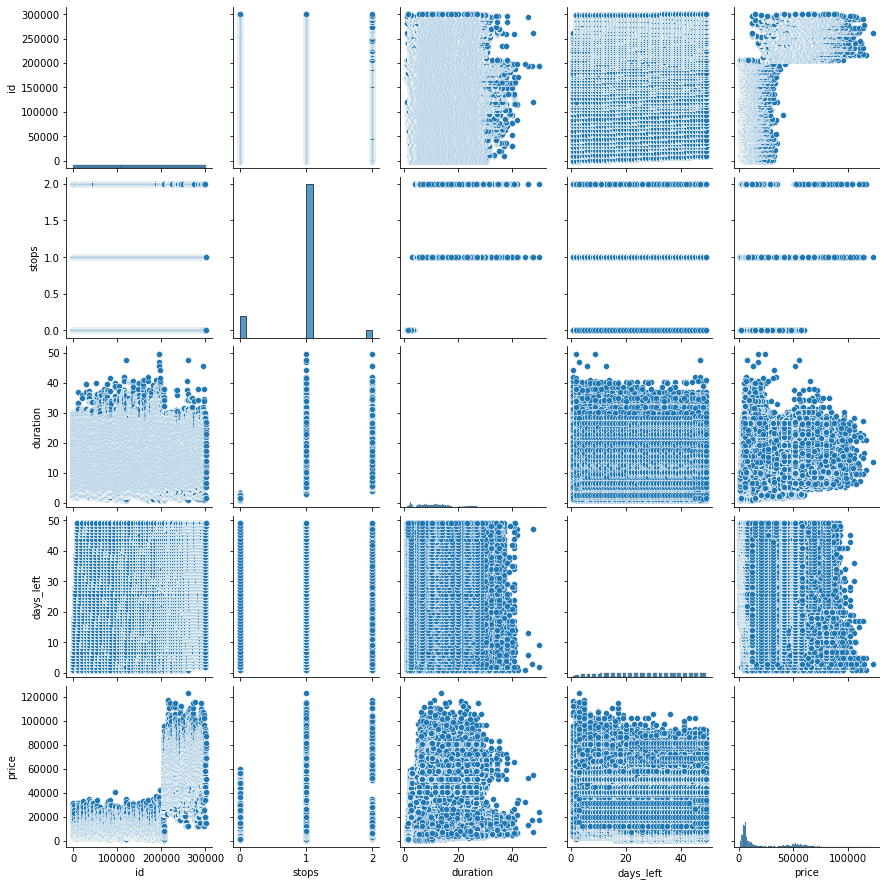

In [20]:
plt.figure(dpi=120)
sns.pairplot(df)
plt.show()

TypeError: scatter_matrix() missing 1 required positional argument: 'frame'